# FINAL PROJECT SUBMISSION

* Student name: Gabriel Araujo
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

# TABLE OF CONTENTS

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[INTRODUCTION](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB & EXPLORE](#SCRUB-&-EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[CONCLUSIONS & RECOMMENDATIONS](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>

# INTRODUCTION

The contents of this repository detail an analysis of the Flatiron Data Science module 4 project. This analysis is detailed in hopes of making the work accessible and replicable.

## Business Problem

The earliest evidence of wine is from 8,000 years ago in Georgia and today it is one of the most consumed alcoholic beverages in the world. According to Fortune Business Insights, in 2019, the global wine market was valued at USD 364.25 billion and is projected to reach USD 444.93 billion by 2027. 

Common reasons why people consume wine include:
- It can be used before a meal to improve one's appetite.
- Drinking wine during a meal can enhance and complement the flavor of food.
- It is served during social and religious gatherings.
- Health benefits, such as heart disease and diabetes prevention. 

No matter the reason for consumption, people enjoy to drink the best wine they can afford. A good way to assure that a great tasting wine is being purchased is to look at it's score. A wine score is the simplest way for a wine critic to communicate their opinion about the quality of a wine. The 100-point is the most common method for scoring wines and it is used by several wine critics from all around the world.

The 100-point scale works as follows:

![graph1](./images/Wine_Scale.jpg)

This project will focus on creating a model that can determine if the quality of a wine is good or bad based on words used in its review and use the findings from that same model to assist wine makers by giving them pointers into what flavors, textures, colors they should focus on when making their wine.

## Goals

The goals of this project are:
- Create a model that can efficiently distinguish and identify very good quality wines from low quality wines.
- Determine key features in high quality wines.
- Determine the best method to preprocess ,analyze, and model wine reviews.

## Data

The dataset being analyzed in this project is called "Wine Reviews" and was taken from https://www.kaggle.com/zynicide/wine-reviews

This dataset consists of 150,930 observations and 10 unique features.

## Method

<font size = "4"> **Analysis Framework** </font>

This project will use the OSEMN framework (outlined in brief below)

**Obtain**
 
- Obtain Wine Reviews dataset from Kaggle.com.

**Scrub**
 
- Remove unwanted features (Country, Designation, Price, etc...).
- Fill/remove null values.
- Remove stop words from corpus.

**Explore**
 
- Create Word Cloud.

**Model**
- Random Forests Classifier.
- Deep NLP

**Interpret**
- Results.
-  Recommendations and Future Work.

# OBTAIN

## Imports

In [92]:
import pandas as pd
from nltk import word_tokenize
from gensim.models import word2vec
from nltk import FreqDist
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV

from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

import numpy as np

import seaborn as sns

from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.layers import Input,Dense,LSTM,Embedding
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.utils import to_categorical

import tensorflow as tf

import keras
import xgboost as xgb

import os
from PIL import Image

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
from sklearn.utils.class_weight import compute_class_weight

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw')

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


## Wine Reviews Dataframe

In [2]:
df = pd.read_csv('winemag-data_first150k.csv',index_col='Unnamed: 0')
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


# SCRUB & EXPLORE

## Data Frame

In [3]:
#CREATING DF WITH ONLY DESCRIPTION AND POINTS COLUMNS
columns = ['description','points']
df = df[columns]
df

,description,points
0,This tremendous 100% varietal wine hails from ...,96
1,"Ripe aromas of fig, blackberry and cassis are ...",96
2,Mac Watson honors the memory of a wine once ma...,96
3,"This spent 20 months in 30% new French oak, an...",96
4,"This is the top wine from La Bégude, named aft...",95
...,...,...
150925,Many people feel Fiano represents southern Ita...,91
150926,"Offers an intriguing nose with ginger, lime an...",91
150927,This classic example comes from a cru vineyard...,91
150928,"A perfect salmon shade, with scents of peaches...",90


In [4]:
#CHECKING FOR NULL VALUES
print(df.isna().sum())

#REPLACING POINT WITH CATEGORIES (<=87: NOT RECOMMENDED,> 87: VERY GOOD)

replace_dict = {}

for i in range(80,101):
    if i <= 87:
        replace_dict[i] = 'NOT RECOMMENDED'
    else:
        replace_dict[i] = 'VERY GOOD'
df['points'] = df['points'].replace(replace_dict)

#GETTING POINTS DISTRIBUTION
df['points'].value_counts(normalize = True)

description    0
points         0
dtype: int64


C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


VERY GOOD          0.523435
NOT RECOMMENDED    0.476565
Name: points, dtype: float64

## Stopwords

In [5]:
#CREATING STOPWORDS LIST TO REMOVE FROM CORPUS
stopwords_list = stopwords.words('english')

# ADDING PUNCTUATION TO STOPWORDS_LIST
stopwords_list.extend(string.punctuation)



# ADDING ADDITIONAL PUNCTUATION TO STOPWORDS_LIST
additional_punc = ['“','”','...',"''",'’','``']
stopwords_list.extend(additional_punc)

#ADDING COMMON WINE RELATED TERMS TO THE LIST
stopwords_list.extend(['wine','drink','fruit','flavors','finish','black',
                       'acidity','good','tannin','tannins',
                      'aroma','aromas','palate','ripe','cherry','spice'])

#PRINTING LAST ITEM ON LIST TO MAKE SURE IT WORKED
stopwords_list[-1]

'spice'

## Word Cloud

In [6]:
#CREATING CORPUS WITH ALL TEXT IN DESCRIPTION COLUMN
corpus = df['description'].to_list()

#TOKENIZING TEXT
tokens = word_tokenize(','.join(corpus))

#REMOVING STOPWORDS FROM TEXT
stopped_tokens= [w.lower() for w in tokens if w.lower() not in stopwords_list]

**WordCloud**

- Image-colored wordcloud: https://amueller.github.io/word_cloud/auto_examples/colored.html

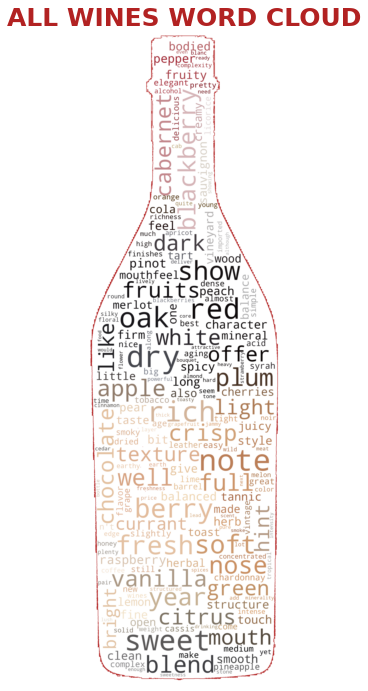

In [112]:
#MASK IMAGE
bottle = np.array(Image.open('./images/bottle.png'))

wordcloud = WordCloud(stopwords=stopwords_list,
                      collocations=False,
                     background_color = 'white',
                     mask=bottle,
                      contour_width=2,
                      contour_color='firebrick')

#GENERATE WORD CLOUD
wordcloud.generate(','.join(stopped_tokens))

#STORE TO FILE
wordcloud.to_file('./images/bottle_wc.png')

#CREATE COLORING FROM IMAGE
image_colors = ImageColorGenerator(bottle)


#PLOTTING
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.title('ALL WINES WORD CLOUD',fontdict = {'fontsize':25,'fontweight':'bold','color':'firebrick'})


plt.show()

In [8]:
#TOKENIZING WORDS FROM VERY GOOD WINES
df_vg = df[df['points'] == 'VERY GOOD']
corpus_vg = df_vg['description'].to_list()
tokens_vg = word_tokenize(','.join(corpus_vg))
stopped_tokens_vg= [w.lower() for w in tokens_vg if w.lower() not in stopwords_list]


#TOKENIZING WORDS FROM NOT RECOMMENDED WINES
df_nr = df[df['points'] == 'NOT RECOMMENDED']
corpus_nr = df_nr['description'].to_list()
tokens_nr = word_tokenize(','.join(corpus_nr))
stopped_tokens_nr= [w.lower() for w in tokens_nr if w.lower() not in stopwords_list]

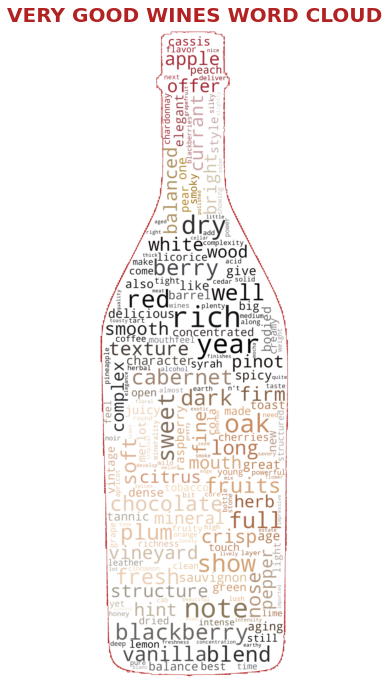

In [115]:
#CREATING WORD CLOUDS FOR VERY GOOD WINES
wordcloud.generate(','.join(stopped_tokens_vg))

#STORE TO FILE
wordcloud.to_file('./images/bottle_vg.png')

#CREATE COLORING FROM IMAGE
image_colors = ImageColorGenerator(bottle)


#PLOTTING
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.title('VERY GOOD WINES WORD CLOUD',fontdict = {'fontsize':20,'fontweight':'bold','color':'firebrick'})


plt.show()

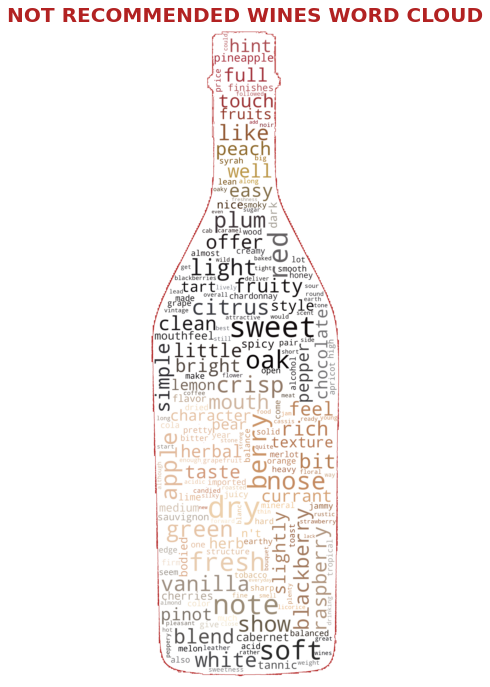

In [116]:
#CREATING WORD CLOUDS FOR NOT RECOMMENDED WINES
wordcloud.generate(','.join(stopped_tokens_nr))

#STORE TO FILE
wordcloud.to_file('./images/bottle_nr.png')

#CREATE COLORING FROM IMAGE
image_colors = ImageColorGenerator(bottle)


#PLOTTING
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.title('NOT RECOMMENDED WINES WORD CLOUD',fontdict = {'fontsize':20,'fontweight':'bold','color':'firebrick'})


plt.show()

# MODEL

## Creating Function to Evaluate Random Forest Model

In [11]:
#CREATING FUNCTION TO EVALUATE MODELS

def model_eval(model,X_train,y_train,X_test,y_test,classes=None,
                           normalize='true',cmap='Blues',label=''):

#         """Example function with PEP 484 type annotations.

#         Args:
#             model: The Model Classifier.
#             X_train: X_train being used to fit model (could be scaled or not).
#             y_train: y_train being used to fit model and to get train accuracy.
#             X_test: X_test to get test predictions.
#             y_test: y_test used to get test accuracy
#             classes: Class labels
#             normalize: set to true
#             cmap: Color scheme for Confusion Matrix. Set to Blues
#             label: Confusion Matrix Label

#         Returns:
#             Model Accuracy. Confusion Matrix, ROC Curve, and best params for GridSearch

#     """
    
    
    #FITTING MODEL WITH TRAIN DATA
    model.fit(X_train,y_train)   
      
    #GETTING TRAIN PREDICTIONS
    y_hat_train = model.predict(X_train)
    
    #GETING TEST PREDICTIONS
    y_hat_test = model.predict(X_test)
    
    dashes = '---'*20
    
    if isinstance(model,GridSearchCV):
        grid_header = "GRID SEARCH FOUND THE FOLLOWING OPTIMAL PARAMETERS: "
        print(dashes,grid_header,dashes,sep='\n')
        best_parameters = model.best_params_
        for param_name in sorted(best_parameters.keys()):
            print("%s: %r" % (param_name, best_parameters[param_name]))
    
    #GETTING ACCURACY SCORE FOR TRAIN AND TEST
    
    if len(label)>0:
        accuracy_header = f'{label} ACCURACY'
    else:
        accuracy_header = 'MODEL ACCURACY'
    print(dashes,accuracy_header,dashes,sep='\n')
    training_accuracy = accuracy_score(y_train, y_hat_train)
    testing_accuracy = accuracy_score(y_test, y_hat_test)
    
    print(f'TRAINING ACCURACY: {round(training_accuracy*100,2)}%')
    print(f'TESTING ACCURACY: {round(testing_accuracy*100,2)}%')
          
    #CLASSIFICATION REPORT AND SCORES
    test_header = "CLASSIFICATION REPORT"
    
    #ADDING LABEL IF GIVEN
    if len(label)>0:
        test_header += f" USING {label}"
    
    # PRINT CLASSIFICATION REPORT
    
    print(dashes,test_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))

    print(dashes+"\n\n")
    
    

    # MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,10),ncols=1)
   

    # PLOTTING CONFUSION MATRIX 
    if isinstance(model,GridSearchCV):
        metrics.plot_confusion_matrix(model.best_estimator_, X_test,y_test,
                                      display_labels=classes,
                                      normalize=normalize,
                                     cmap=cmap,ax=axes,xticks_rotation=45)
        axes.set(title='Confusion Matrix')
    else:
        metrics.plot_confusion_matrix(model, X_test,y_test,
                                      display_labels=classes,
                                      normalize=normalize,
                                     cmap=cmap,ax=axes,xticks_rotation=45)
        axes.set(title='Confusion Matrix')
    
    fig.tight_layout()
    plt.show()

   

## Getting Data Ready to Model

In [12]:
#DEFINING Y (TARGET) AND X VARIABLES
y = df['points'].copy()
X=df['description'].copy()
X

0         This tremendous 100% varietal wine hails from ...
1         Ripe aromas of fig, blackberry and cassis are ...
2         Mac Watson honors the memory of a wine once ma...
3         This spent 20 months in 30% new French oak, an...
4         This is the top wine from La Bégude, named aft...
                                ...                        
150925    Many people feel Fiano represents southern Ita...
150926    Offers an intriguing nose with ginger, lime an...
150927    This classic example comes from a cru vineyard...
150928    A perfect salmon shade, with scents of peaches...
150929    More Pinot Grigios should taste like this. A r...
Name: description, Length: 150930, dtype: object

In [13]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=69)

In [14]:
# CHECKING Y_TRAIN AND Y_TEST VALUE COUNTS TO SEE IF IT MATCHES THE DF DISTRIBUTION

print(f'y_train value counts: \n {y_train.value_counts(normalize = True)}')
print('\n')
print(f'y_test value counts: \n {y_test.value_counts(normalize = True)}')

y_train value counts: 
 VERY GOOD          0.524192
NOT RECOMMENDED    0.475808
Name: points, dtype: float64
y_test value counts: 
 VERY GOOD          0.520407
NOT RECOMMENDED    0.479593
Name: points, dtype: float64


In [16]:
#MAKE TFIDFVECTORIZER USING STOPWORDS_LIST
vectorizer = TfidfVectorizer(stop_words=stopwords_list)

# VECTORIZE DATA AND MAKE X_train_tfidf and X_test_tfidf
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf

<120744x28980 sparse matrix of type '<class 'numpy.float64'>'
	with 2516081 stored elements in Compressed Sparse Row format>

In [18]:
print (len(vectorizer.vocabulary_))

28980


## Evaluating Random Forest Model

In [65]:
#INITIALIZING CLASSIFIER
rf = RandomForestClassifier(class_weight='balanced')

------------------------------------------------------------
MODEL ACCURACY
------------------------------------------------------------
TRAINING ACCURACY: 100.0%
TESTING ACCURACY: 90.99%
------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
                 precision    recall  f1-score   support

NOT RECOMMENDED       0.90      0.91      0.91     14477
      VERY GOOD       0.92      0.91      0.91     15709

       accuracy                           0.91     30186
      macro avg       0.91      0.91      0.91     30186
   weighted avg       0.91      0.91      0.91     30186

------------------------------------------------------------




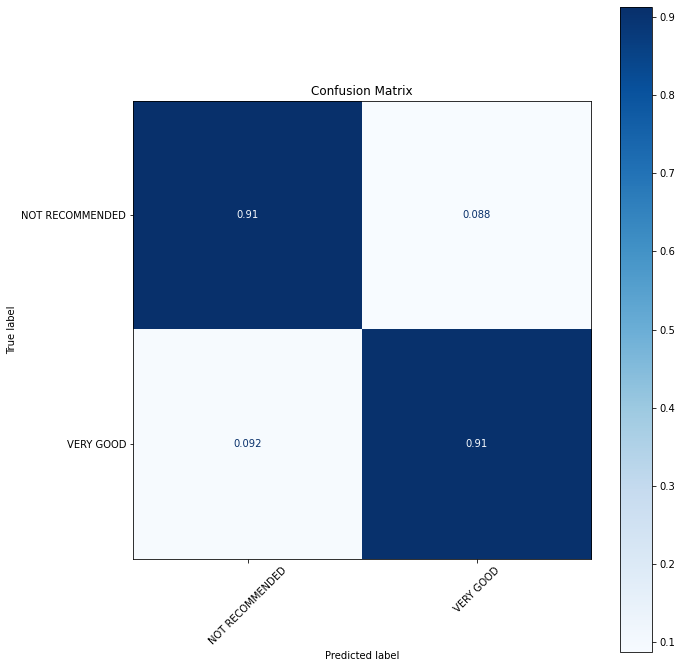

In [20]:
#EVALUATING MODEL USING FUNCTION
model_eval(rf,X_train_tfidf,y_train,X_test_tfidf,y_test)

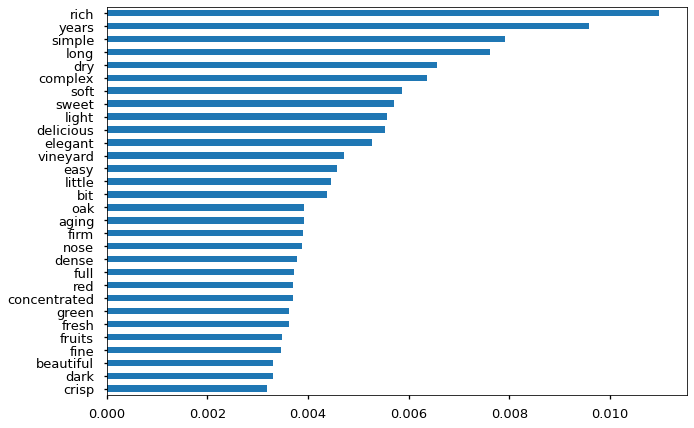

In [21]:
# PLOTTING 30 MOST IMPORTANT FEATURES
with plt.style.context('seaborn-talk'):

    #GETTING FEATURE IMPORTANCE
    importance = pd.Series(rf.feature_importances_,index=vectorizer.get_feature_names())

    # SORTING VALUES AND CREATING A BAR CHART WITH 30 MOST IMPORTANT
    importance.sort_values().tail(30).plot(kind='barh')

## Grid Search

### CREATING A PIPELINE FOR GRIDSEARCH

In [25]:
#CREATING A PIPELINE
count_vect = CountVectorizer()
tf_transform = TfidfTransformer(use_idf=True)
lemmatizer = WordNetLemmatizer()
tokenizer = nltk.TweetTokenizer(preserve_case=False)

text_pipe = Pipeline(steps=[                       
    ('count_vectorizer',count_vect),
    ('tf_transformer',tf_transform)])

full_pipe = Pipeline(steps=[
    ('text_pipe',text_pipe),
    ('clf',xgb.XGBClassifier(class_weight='balanced'))
])
full_pipe

Pipeline(steps=[('text_pipe',
                 Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                                 ('tf_transformer', TfidfTransformer())])),
                ('clf', XGBClassifier(class_weight='balanced'))])

In [26]:
#CREATING PARAMETERS DICTIONARY FOR PIPELINE GRIDSEARCH
params = {'text_pipe__tf_transformer__use_idf':[True, False],
         'text_pipe__count_vectorizer__tokenizer':[None,tokenizer.tokenize],
          'text_pipe__count_vectorizer__preprocessor':[None,lemmatizer.lemmatize],
         'text_pipe__count_vectorizer__stop_words':[None,stopwords_list],
         'clf__criterion':['gini', 'entropy']}

### EVALUATING GRIDSEARCH

In [27]:
#INITIALIZING GRIDSEARCHCV
grid = GridSearchCV(full_pipe,params,cv=3,)

In [28]:
#EVALUATING GRIDSEARCH MODEL
# model_eval(grid,X_train,y_train,X_test,y_test)

## DEEP NLP

### Deep NLP Evaluation Function

In [29]:
#CREATING MODEL EVALUATION FUNCTION FOR DEEP NLP

def model_eval_2(y_test,y_hat_test, normalize='true',cmap='Blues',label='MODEL',
                           title='Confusion matrix',classes= [0,1]):

#         """Example function with PEP 484 type annotations.

#         Args:
#             model: The Model Classifier.
#             X_train: X_train being used to fit model (could be scaled or not).
#             y_train: y_train being used to fit model and to get train accuracy.
#             X_test: X_test to get test predictions.
#             y_test: y_test used to get test accuracy
#             classes: Class labels
#             normalize: set to true
#             cmap: Color scheme for Confusion Matrix. Set to Blues
#             label: Confusion Matrix Label

#         Returns:
#             Model Accuracy. Confusion Matrix, ROC Curve, and best params for GridSearch

#     """
    
    dashes = '---'*20

    #GETTING ACCURACY SCORE FOR TRAIN AND TEST    
    accuracy_header = f'{label} ACCURACY'
    print(dashes,accuracy_header,dashes,sep='\n')
    testing_accuracy = accuracy_score(y_test, y_hat_test)
    
    print(f'TESTING ACCURACY: {round(testing_accuracy*100,2)}%')
          
        
    #CLASSIFICATION REPORT AND SCORES
    test_header = f"{label} CLASSIFICATION REPORT"
    
    
    # PRINT CLASSIFICATION REPORT    
    print(dashes,test_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))

    print(dashes+"\n\n")
        
        
    # MAKE FIGURE
    fig, axes = plt.subplots(figsize=(15,5),ncols=3)      
   

    # PLOTTING CONFUSION MATRIX 

    cm = confusion_matrix(y_true=y_test, y_pred=y_hat_test,normalize=normalize)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(ax=axes[2])
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    #PLOTTING  LOSS VS. VAL_LOSS AND ACCURACY VS. VAL_ACCURACY
    history_df = pd.DataFrame(history.history)

    loss_df = history_df[[col for col in history_df.columns if 'loss' in col]]
    loss_df = loss_df.reset_index()
    
    acc_df = history_df[[col for col in history_df.columns if 'acc' in col]]
    acc_df = acc_df.reset_index()
    
    sns.lineplot(x='index',y='val_loss',data=loss_df,marker='o',ax=axes[0])
    sns.lineplot(x='index',y='loss',data=loss_df,marker='o',ax=axes[0])
    
    sns.lineplot(x='index',y='val_accuracy',data=acc_df,marker='o',ax=axes[1])
    sns.lineplot(x='index',y='accuracy',data=acc_df,marker='o',ax=axes[1])
    
    fig.tight_layout()
    plt.show()

   

### Training Word 2 Vec

In [30]:
#TRAINING WORD2VEC FROM FULL DF AND APPLYING SIMPLE PREPROCESSING
lower_df=df['description'].map(lambda x: simple_preprocess(x.lower(),deacc=True,
                                                         max_len=200))

print(df['description'][0])
print('/n')
print(lower_df[0])

This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.
/n
['this', 'tremendous', 'varietal', 'wine', 'hails', 'from', 'oakville', 'and', 'was', 'aged', 'over', 'three', 'years', 'in', 'oak', 'juicy', 'red', 'cherry', 'fruit', 'and', 'compelling', 'hint', 'of', 'caramel', 'greet', 'the', 'palate', 'framed', 'by', 'elegant', 'fine', 'tannins', 'and', 'subtle', 'minty', 'tone', 'in', 'the', 'background', 'balanced', 'and', 'rewarding', 'from', 'start', 'to', 'finish', 'it', 'has', 'years', 'ahead', 'of', 'it', 'to', 'develop', 'further', 'nuance', 'enjoy']


In [31]:
#INITIALIZING W2V MODEL
wv_model = Word2Vec(lower_df,size=128,window=6,min_count=1)

#TRAINING W2V MODEL
wv_model.train(lower_df,total_examples=wv_model.corpus_count,epochs=100)

W0122 13:24:42.364137 12740 base_any2vec.py:1168] Effective 'alpha' higher than previous training cycles


(429808637, 588305500)

In [32]:
#GET KEYED VECTOR
wv=wv_model.wv
wv

In [33]:
#CHECKING THE VECTOR OF THE WORD FLAVOR
wv['flavor']

array([ 1.4110531 , -2.788358  , -2.9517329 ,  1.3251494 , -0.3532809 ,
       -2.8344314 , -1.5070744 ,  1.1248287 ,  0.89892405, -1.822286  ,
        0.7579393 ,  0.37284493,  0.08497272, -1.1247828 , -1.6295632 ,
        0.07205799,  1.4708486 , -6.2154994 ,  0.30292636, -1.0752289 ,
        1.6520423 ,  4.739329  , -2.2176096 , -2.3782692 ,  1.0849537 ,
        1.5766493 ,  0.7769524 ,  1.8672152 ,  2.2923613 , -0.75387335,
       -1.7266945 , -0.1190623 , -0.09442969,  0.7395258 ,  0.59011054,
        1.1920824 , -3.7360647 ,  3.8542957 ,  3.683965  , -1.2619512 ,
        1.9493172 , -1.6507064 , -1.94576   ,  1.4647809 ,  2.5179114 ,
        1.0117568 , -1.2396007 , -1.5556554 , -1.1232586 ,  1.6422738 ,
       -0.19935858, -2.8689263 , -5.171531  , -1.3891151 , -1.2510967 ,
        1.257559  ,  1.7950684 ,  2.1119905 ,  0.56707937,  4.095618  ,
        1.8999995 , -1.3707417 , -1.1678952 ,  1.3896855 , -1.2762102 ,
       -0.42968574, -2.9811199 , -6.9923024 , -0.15613373, -0.79

In [34]:
#CHECKING THE LENGTH OF W2V VOCAB
len(wv.vocab)

29870

In [35]:
#CHECKING IF W2V LEARNED THE PROPER MEANING OF WORDS
wv.most_similar('fruity')

[('fruited', 0.5186324715614319),
 ('perfumed', 0.47476422786712646),
 ('flavored', 0.47475665807724),
 ('fruitiness', 0.4399396777153015),
 ('juicy', 0.43557286262512207),
 ('extravagant', 0.412444531917572),
 ('fragrant', 0.40835753083229065),
 ('superfruity', 0.39931613206863403),
 ('emphatic', 0.3921317160129547),
 ('flavorful', 0.38052603602409363)]

### Getting Ready to Model

In [39]:
# y=label_binarize(df['points'].copy(),classes = ['NOT RECOMMENDED','VERY GOOD'])
y = df['points'].replace({'NOT RECOMMENDED':0, 'VERY GOOD':1})
X=df['description'].copy()

In [40]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=69)

In [42]:
weights = compute_class_weight('balanced',np.unique(y_train),y_train)

weights_dict = dict(zip(np.unique(y_train),weights))
weights_dict

{0: 1.0508433273572262, 1: 0.9538495568230294}

In [43]:
#ONE HOT ENCODE
y_train_seq=to_categorical(y_train)

y_test_seq=to_categorical(y_test)
print(y_train_seq.shape)
y_test_seq

(120744, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [44]:
#TOKENIZE TEXT
MAX_WORDS=20000
tokenizer = text.Tokenizer(num_words = MAX_WORDS)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

#FIND LONGEST SEQUENCE
MAX_SEQUENCE_LENGTH= max(list(map(lambda x:len(x),[*train_sequences,*test_sequences])))
MAX_SEQUENCE_LENGTH

136

In [51]:
X_train_seq = sequence.pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH)
X_test_seq = sequence.pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH)

X_train_seq

array([[   0,    0,    0, ..., 5086,    8, 1862],
       [   0,    0,    0, ...,    1,   33,    9],
       [   0,    0,    0, ...,    1,   80,  664],
       ...,
       [   0,    0,    0, ...,    1,   93,   22],
       [   0,    0,    0, ...,    3,  542,  185],
       [   0,    0,    0, ...,    1, 1595,   18]])

In [52]:
len(tokenizer.index_word)

34861

In [54]:
#GOT FROM JAMES IRVING
def get_earlystop(monitor='val_loss',patience=3, restore_best_weights=True):
    """"""""
    args = locals()
    return EarlyStopping(**args)

### Model with Regular Embeddings using LSTM layer

In [55]:
def make_model(EMBEDDING_SIZE=128):
    model=Sequential()
    
    model.add(Embedding(MAX_WORDS,EMBEDDING_SIZE))    
    model.add(LSTM(64,return_sequences=False,recurrent_dropout=0.2))
    model.add(Dense(32,activation=tf.keras.layers.LeakyReLU(),kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(2, activation='softmax'))
    

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    
    display(model.summary())
    
    return model

model = make_model()

history = model.fit(X_train_seq, y_train_seq, epochs=50,batch_size=64, 
                    validation_split = 0.2, callbacks=get_earlystop(),
                   class_weight=weights_dict,workers=3)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 2,611,554
Trainable params: 2,611,554
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/50
1510/1510 [==============================] - 249s 165ms/step - loss: 0.3764 - accuracy: 0.8298 - val_loss: 0.3323 - val_accuracy: 0.8538
Epoch 2/50
1510/1510 [==============================] - 284s 188ms/step - loss: 0.2787 - accuracy: 0.8796 - val_loss: 0.3176 - val_accuracy: 0.8622
Epoch 3/50
1510/1510 [==============================] - 279s 185ms/step - loss: 0.2258 - accuracy: 0.9041 - val_loss: 0.3220 - val_accuracy: 0.8670
Epoch 4/50
1510/1510 [==============================] - 275s 182ms/step - loss: 0.1902 - accuracy: 0.9200 - val_loss: 0.3368 - val_accuracy: 0.8659
Epoch 5/50
1510/1510 [==============================] - 271s 180ms/step - loss: 0.1585 - accuracy: 0.9345 - val_loss: 0.3837 - val_accuracy: 0.8706


------------------------------------------------------------
REGULAR EMBEDDING MODEL ACCURACY
------------------------------------------------------------
TESTING ACCURACY: 86.12%
------------------------------------------------------------
REGULAR EMBEDDING MODEL CLASSIFICATION REPORT
------------------------------------------------------------
                 precision    recall  f1-score   support

NOT RECOMMENDED       0.83      0.89      0.86     14477
      VERY GOOD       0.89      0.83      0.86     15709

       accuracy                           0.86     30186
      macro avg       0.86      0.86      0.86     30186
   weighted avg       0.86      0.86      0.86     30186

------------------------------------------------------------




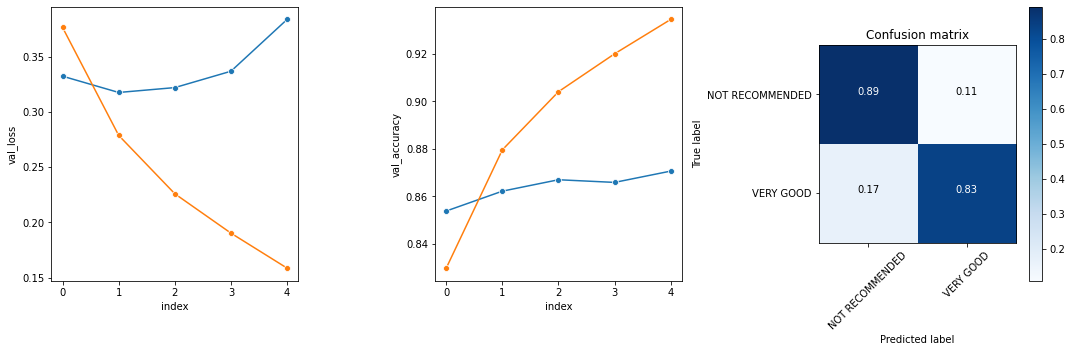

In [56]:
model_eval_2(y_test,y_hat_test,classes=['NOT RECOMMENDED',"VERY GOOD"],
             label= 'REGULAR EMBEDDING MODEL')

### Model with Word 2 Vec Embedding using LSTM layer

In [57]:
def make_model_w2v(wv):
    model=Sequential()
    
    model.add(wv.get_keras_embedding())
    model.add(LSTM(64,return_sequences=False,recurrent_dropout=0.2))
    model.add(Dense(32,activation=tf.keras.layers.LeakyReLU(),
                    kernel_regularizer=regularizers.l2(0.001)))
#     model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    
    display(model.summary())
    
    return model

model = make_model_w2v(wv)

history = model.fit(X_train_seq, y_train_seq, epochs=50,batch_size=64, 
                    validation_split = 0.2, callbacks=get_earlystop(),
                   class_weight=weights_dict,workers=3)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         3823360   
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 3,874,914
Trainable params: 51,554
Non-trainable params: 3,823,360
_________________________________________________________________


None

Epoch 1/50
1510/1510 [==============================] - 269s 178ms/step - loss: 0.4883 - accuracy: 0.7668 - val_loss: 0.4132 - val_accuracy: 0.8108
Epoch 2/50
1510/1510 [==============================] - 266s 176ms/step - loss: 0.3729 - accuracy: 0.8336 - val_loss: 0.4064 - val_accuracy: 0.8156
Epoch 3/50
1510/1510 [==============================] - 269s 178ms/step - loss: 0.3346 - accuracy: 0.8525 - val_loss: 0.3680 - val_accuracy: 0.8380
Epoch 4/50
1510/1510 [==============================] - 268s 177ms/step - loss: 0.3059 - accuracy: 0.8663 - val_loss: 0.3654 - val_accuracy: 0.8388
Epoch 5/50
1510/1510 [==============================] - 285s 188ms/step - loss: 0.2829 - accuracy: 0.8785 - val_loss: 0.3583 - val_accuracy: 0.8453
Epoch 6/50
1510/1510 [==============================] - 283s 188ms/step - loss: 0.2642 - accuracy: 0.8879 - val_loss: 0.3620 - val_accuracy: 0.8486
Epoch 7/50
1510/1510 [==============================] - 281s 186ms/step - loss: 0.2493 - accuracy: 0.8951 - val_

------------------------------------------------------------
WORD2VEC MODEL ACCURACY
------------------------------------------------------------
TESTING ACCURACY: 84.97%
------------------------------------------------------------
WORD2VEC MODEL CLASSIFICATION REPORT
------------------------------------------------------------
                 precision    recall  f1-score   support

NOT RECOMMENDED       0.83      0.87      0.85     14477
      VERY GOOD       0.87      0.83      0.85     15709

       accuracy                           0.85     30186
      macro avg       0.85      0.85      0.85     30186
   weighted avg       0.85      0.85      0.85     30186

------------------------------------------------------------




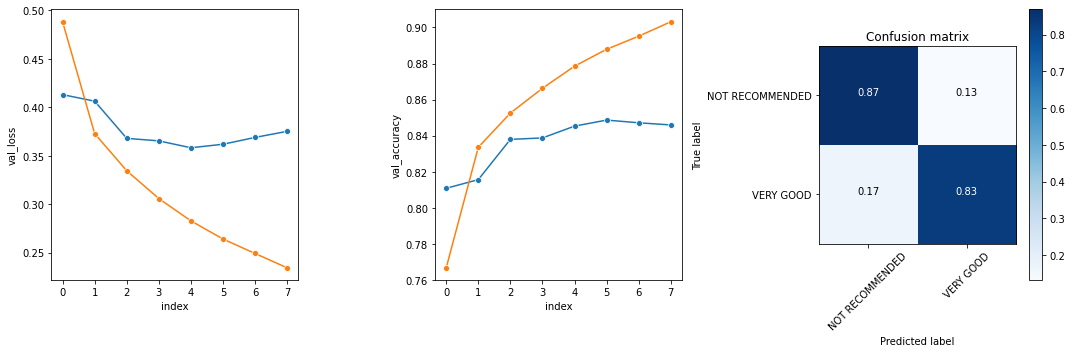

In [58]:
model_eval_2(y_test_seq.argmax(axis=1),y_hat_test,classes=['NOT RECOMMENDED',"VERY GOOD"],
             label= 'WORD2VEC MODEL')

### Model with Glove Embedding using LSTM layer

**Converting Glove to Word 2 Vec Format**
- Getting glove into w2vec format: https://radimrehurek.com/gensim/scripts/glove2word2vec.html

In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath(glove_twitter_file)
tmp_file = get_tmpfile(glove_folder+'glove_to_w2vec.txt')
_ = glove2word2vec(glove_file, tmp_file)
model_glove = KeyedVectors.load_word2vec_format(tmp_file)

In [ ]:
def make_model_glove(wv):
    model=Sequential()
    
    model.add(wv.get_keras_embedding())
    model.add(LSTM(64,return_sequences=False,recurrent_dropout=0.2))
    model.add(Dense(32,activation=tf.keras.layers.LeakyReLU(),
                    kernel_regularizer=regularizers.l2(0.001)))
#     model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))    

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    
    display(model.summary())
    
    return model

model = make_model_glove(wv)

history = model.fit(X_train_seq, y_train_seq, epochs=50,batch_size=64, 
                    validation_split = 0.2, callbacks=get_earlystop(),
                   class_weight=weights_dict,workers=3)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)

In [ ]:
model_eval_2(y_test_seq.argmax(axis=1),y_hat_test,classes=['NOT RECOMMENDED',"VERY GOOD"],
             label= 'GLOVE MODEL')

### Model Using GRU Layer

In [59]:
def make_model_gru(wv):
    model=Sequential()
    
    model.add(wv.get_keras_embedding())
    model.add(GRU(64,return_sequences=False,recurrent_dropout=0.2))
    model.add(Dense(32,activation=tf.keras.layers.LeakyReLU(),
                    kernel_regularizer=regularizers.l2(0.001)))
#     model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))    

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    
    display(model.summary())
    
    return model

model = make_model_gru(wv)

history = model.fit(X_train_seq, y_train_seq, epochs=50,batch_size=64, 
                    validation_split = 0.2, callbacks=get_earlystop(),
                   class_weight=weights_dict,workers=3)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         3823360   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 3,862,754
Trainable params: 39,394
Non-trainable params: 3,823,360
_________________________________________________________________


None

Epoch 1/50
1510/1510 [==============================] - 217s 144ms/step - loss: 0.5571 - accuracy: 0.7209 - val_loss: 0.4388 - val_accuracy: 0.8049
Epoch 2/50
1510/1510 [==============================] - 215s 142ms/step - loss: 0.4045 - accuracy: 0.8214 - val_loss: 0.4014 - val_accuracy: 0.8231
Epoch 3/50
1510/1510 [==============================] - 207s 137ms/step - loss: 0.3639 - accuracy: 0.8399 - val_loss: 0.3795 - val_accuracy: 0.8297
Epoch 4/50
1510/1510 [==============================] - 206s 137ms/step - loss: 0.3396 - accuracy: 0.8506 - val_loss: 0.3674 - val_accuracy: 0.8380
Epoch 5/50
1510/1510 [==============================] - 200s 132ms/step - loss: 0.3217 - accuracy: 0.8591 - val_loss: 0.3663 - val_accuracy: 0.8403
Epoch 6/50
1510/1510 [==============================] - 215s 143ms/step - loss: 0.3072 - accuracy: 0.8668 - val_loss: 0.3948 - val_accuracy: 0.8269
Epoch 7/50
1510/1510 [==============================] - 209s 139ms/step - loss: 0.2955 - accuracy: 0.8721 - val_

------------------------------------------------------------
GRU MODEL ACCURACY
------------------------------------------------------------
TESTING ACCURACY: 84.29%
------------------------------------------------------------
GRU MODEL CLASSIFICATION REPORT
------------------------------------------------------------
                 precision    recall  f1-score   support

NOT RECOMMENDED       0.82      0.86      0.84     14477
      VERY GOOD       0.86      0.83      0.85     15709

       accuracy                           0.84     30186
      macro avg       0.84      0.84      0.84     30186
   weighted avg       0.84      0.84      0.84     30186

------------------------------------------------------------




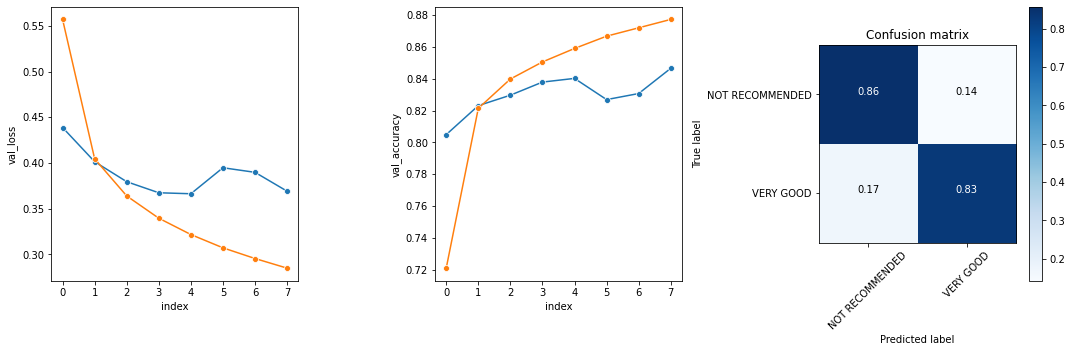

In [60]:
model_eval_2(y_test_seq.argmax(axis=1),y_hat_test,classes=['NOT RECOMMENDED',"VERY GOOD"],
             label= 'GRU MODEL')

### Model Using Double LSTM Layers

In [61]:
def make_model_2lstm(wv):
    model=Sequential()
    
    model.add(wv.get_keras_embedding())
    model.add(LSTM(64,return_sequences=True,recurrent_dropout=0.2))
    model.add(LSTM(64,return_sequences=False,recurrent_dropout=0.2))
    model.add(Dense(32,activation=tf.keras.layers.LeakyReLU()
                    ,kernel_regularizer=regularizers.l2(0.001)))
#     model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))
    

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    
    display(model.summary())
    
    return model

model = make_model_2lstm(wv)

history = model.fit(X_train_seq, y_train_seq, epochs=50,batch_size=64, 
                    validation_split = 0.2, callbacks=get_earlystop(),
                   class_weight=weights_dict,workers=3)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         3823360   
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 64)          49408     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 3,907,938
Trainable params: 84,578
Non-trainable params: 3,823,360
_________________________________________________________________


None

Epoch 1/50
1510/1510 [==============================] - 1024s 678ms/step - loss: 0.4409 - accuracy: 0.7981 - val_loss: 0.3898 - val_accuracy: 0.8250
Epoch 2/50
1510/1510 [==============================] - 1050s 696ms/step - loss: 0.3469 - accuracy: 0.8463 - val_loss: 0.3571 - val_accuracy: 0.8383
Epoch 3/50
1510/1510 [==============================] - 1084s 718ms/step - loss: 0.3041 - accuracy: 0.8674 - val_loss: 0.3610 - val_accuracy: 0.8373
Epoch 4/50
1510/1510 [==============================] - 1063s 704ms/step - loss: 0.2732 - accuracy: 0.8837 - val_loss: 0.3380 - val_accuracy: 0.8562
Epoch 5/50
1510/1510 [==============================] - 1056s 699ms/step - loss: 0.2457 - accuracy: 0.8988 - val_loss: 0.3400 - val_accuracy: 0.8614
Epoch 6/50
1510/1510 [==============================] - 1140s 755ms/step - loss: 0.2209 - accuracy: 0.9107 - val_loss: 0.3606 - val_accuracy: 0.8611
Epoch 7/50
1510/1510 [==============================] - 1061s 703ms/step - loss: 0.2023 - accuracy: 0.9191

------------------------------------------------------------
DOUBLE LSTM MODEL ACCURACY
------------------------------------------------------------
TESTING ACCURACY: 85.32%
------------------------------------------------------------
DOUBLE LSTM MODEL CLASSIFICATION REPORT
------------------------------------------------------------
                 precision    recall  f1-score   support

NOT RECOMMENDED       0.84      0.86      0.85     14477
      VERY GOOD       0.87      0.84      0.86     15709

       accuracy                           0.85     30186
      macro avg       0.85      0.85      0.85     30186
   weighted avg       0.85      0.85      0.85     30186

------------------------------------------------------------




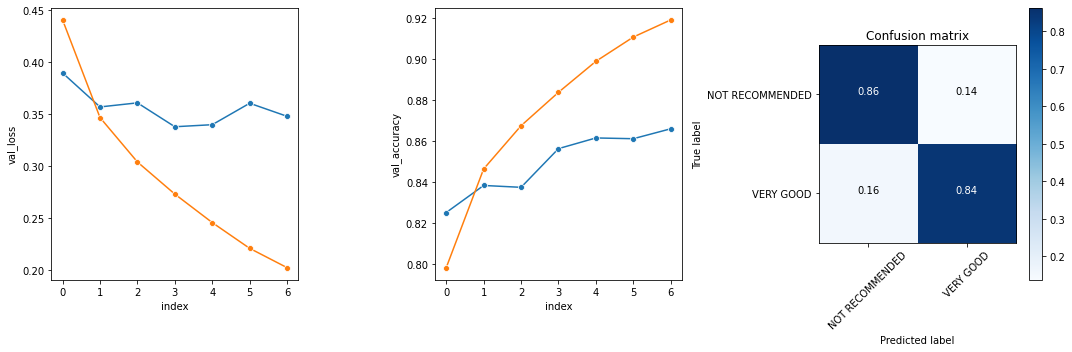

In [62]:
model_eval_2(y_test_seq.argmax(axis=1),y_hat_test,classes=['NOT RECOMMENDED',"VERY GOOD"],
             label= 'DOUBLE LSTM MODEL')

### Model using Bidirectional LSTM Layer

In [63]:
def make_model_bid(wv):
    model=Sequential()
    
    model.add(wv.get_keras_embedding())
    model.add(Bidirectional(LSTM(64,return_sequences=False,recurrent_dropout=0.2)))
    model.add(Dense(32,activation=tf.keras.layers.LeakyReLU(),
                    kernel_regularizer=regularizers.l2(0.001)))
#     model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))
    

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    
    display(model.summary())
    
    return model

model = make_model_bid(wv)

history = model.fit(X_train_seq, y_train_seq, epochs=50,batch_size=64, 
                    validation_split = 0.2, callbacks=get_earlystop(),
                   class_weight=weights_dict,workers=3)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         3823360   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 3,926,370
Trainable params: 103,010
Non-trainable params: 3,823,360
_________________________________________________________________


None

Epoch 1/50
1510/1510 [==============================] - 964s 638ms/step - loss: 0.4928 - accuracy: 0.7661 - val_loss: 0.4135 - val_accuracy: 0.8118
Epoch 2/50
1510/1510 [==============================] - 904s 599ms/step - loss: 0.3753 - accuracy: 0.8336 - val_loss: 0.3813 - val_accuracy: 0.8273
Epoch 3/50
1510/1510 [==============================] - 901s 597ms/step - loss: 0.3361 - accuracy: 0.8523 - val_loss: 0.3736 - val_accuracy: 0.8335
Epoch 4/50
1510/1510 [==============================] - 912s 604ms/step - loss: 0.3067 - accuracy: 0.8684 - val_loss: 0.3758 - val_accuracy: 0.8384
Epoch 5/50
1510/1510 [==============================] - 917s 607ms/step - loss: 0.2835 - accuracy: 0.8794 - val_loss: 0.3671 - val_accuracy: 0.8413
Epoch 6/50
1510/1510 [==============================] - 927s 614ms/step - loss: 0.2645 - accuracy: 0.8890 - val_loss: 0.3621 - val_accuracy: 0.8503
Epoch 7/50
1510/1510 [==============================] - 917s 607ms/step - loss: 0.2485 - accuracy: 0.8972 - val_

------------------------------------------------------------
BIDIRECTIONAL LSTM MODEL ACCURACY
------------------------------------------------------------
TESTING ACCURACY: 85.4%
------------------------------------------------------------
BIDIRECTIONAL LSTM MODEL CLASSIFICATION REPORT
------------------------------------------------------------
                 precision    recall  f1-score   support

NOT RECOMMENDED       0.84      0.86      0.85     14477
      VERY GOOD       0.87      0.85      0.86     15709

       accuracy                           0.85     30186
      macro avg       0.85      0.85      0.85     30186
   weighted avg       0.85      0.85      0.85     30186

------------------------------------------------------------




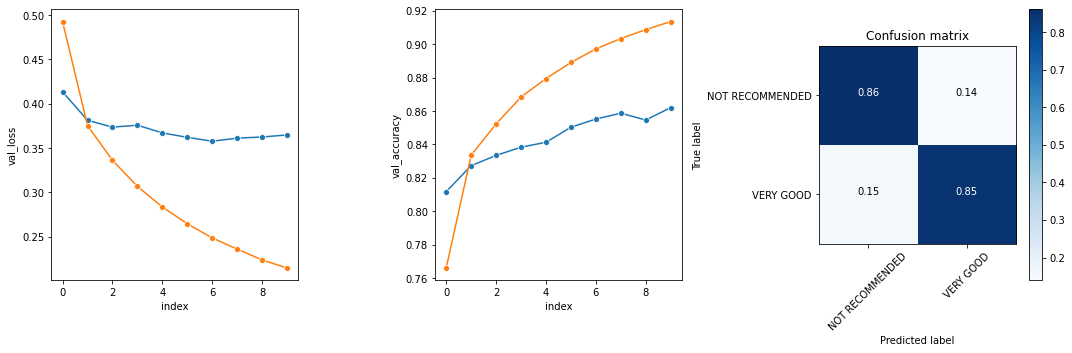

In [64]:
model_eval_2(y_test_seq.argmax(axis=1),y_hat_test,classes=['NOT RECOMMENDED',"VERY GOOD"],
             label= 'BIDIRECTIONAL LSTM MODEL')

# CONCLUSION & RECOMMENDATIONS